In [1]:
import pandas as pd
import geopandas as gpd
import folium

In [46]:
road = gpd.read_file("data/roads/roads.shp")

In [21]:
nta = gpd.read_file('data/nta/nta.shp')

In [22]:
traffic = gpd.read_file('data/traffic/traffic_2015.shx')

In [41]:
def find_nta(row):
    for n in nta.iterrows():
        if n[1]["geometry"].contains(row):
            return n[1]["ntacode"]

In [ ]:
road["nta"] = road["geometry"].apply(find_nta)

In [25]:
avgscore = road.groupby("nta")["rating_b"].sum()/road.groupby("nta")["rating_b"].count()

KeyError: 'Column not found: rating_b'

In [106]:
nta["score"] = avgscore

In [109]:
score = pd.DataFrame(avgscore)

In [110]:
nta= nta.merge(score, left_on = "ntacode", right_on = "nta")

In [114]:
score

,rating_b
nta,
BK09,6.550898
BK17,6.954660
BK19,6.441640
BK21,4.562914
BK23,5.630435
BK25,7.750903
BK26,7.051383
BK27,6.415842
BK28,7.583333


In [60]:
pedestrian = gpd.read_file("data/pedestrian/pedestrian.shp")

In [12]:
pedestrian["sept_18_pm"].describe()

count        114
unique       114
top       12,501
freq           1
Name: sept_18_pm, dtype: object

In [61]:
pedestrian["nta"] = pedestrian["geometry"].apply(find_nta)
pedestrian["sept_18_pm"] = pedestrian["sept_18_pm"].apply(lambda s: int(s[:s.find(",")] + s[s.find(",")+1:]))
pedfreq = pd.DataFrame(pedestrian.groupby("nta")["sept_18_pm"].sum()/pedestrian.groupby("nta")["sept_18_pm"].count())
nta= nta.merge(pedfreq, left_on = "ntacode", right_on = "nta", how = "left")
nta.plot(column='sept_18_pm', legend=True)

c:\users\lilia staszel\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


c:\users\lilia staszel\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


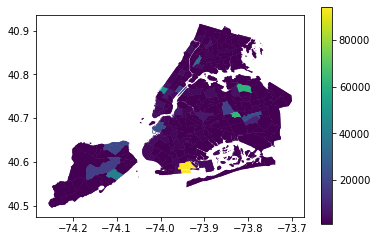

In [62]:
pedestrian["nta"] = pedestrian["geometry"].apply(find_nta)
pedestrian["sept_18_md"] = pedestrian["sept_18_md"].apply(lambda s: int(s[:s.find(",")] + s[s.find(",")+1:]))
pedfreq = pd.DataFrame(pedestrian.groupby("nta")["sept_18_md"].sum()/pedestrian.groupby("nta")["sept_18_md"].count())
nta= nta.merge(pedfreq, left_on = "ntacode", right_on = "nta", how = "left")
nta.plot(column='sept_18_md', legend=True)

In [57]:
housing = pd.read_csv("data/housing.csv")

In [77]:
pop = pd.read_csv("data/population.csv")
nta= nta.merge(pop, left_on = "ntacode", right_on = "NTA Code", how= "left")

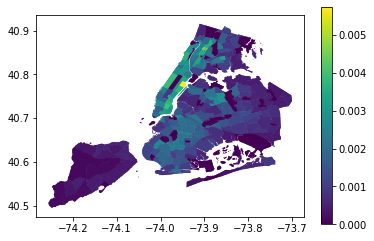

In [31]:
nta["popdensity"] = nta["Population"]/ nta["shape_area"]
nta.plot(column='popdensity', legend=True)

In [26]:
nta

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,sept_18_pm,sept_18_md,...,NTA Code_x,NTA Name_x,Population_x,popdensity,Borough_y,Year_y,FIPS County Code_y,NTA Code_y,NTA Name_y,Population_y
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",1027.0,61619.0,...,QN51,Murray Hill,53009,0.001010,Queens,2000,81,QN51,Murray Hill,53009
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",1027.0,61619.0,...,QN51,Murray Hill,53009,0.001010,Queens,2010,81,QN51,Murray Hill,51739
2,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",1027.0,61619.0,...,QN51,Murray Hill,51739,0.000986,Queens,2000,81,QN51,Murray Hill,53009
3,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904811,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",1027.0,61619.0,...,QN51,Murray Hill,51739,0.000986,Queens,2010,81,QN51,Murray Hill,51739
4,3.0,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.023712,"POLYGON ((-73.95859 40.61040, -73.95828 40.608...",5364.0,2967.0,...,BK25,Homecrest,45679,0.001523,Brooklyn,2000,47,BK25,Homecrest,45679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,5.0,Staten Island,085,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,1.848815e+08,75942.003026,"POLYGON ((-74.09777 40.61062, -74.09730 40.610...",24246.0,18186.0,...,SI24,Todt Hill-Emersn Hill-Heartland Villg-Lighthse...,30714,0.000166,Staten Island,2010,85,SI24,Todt Hill-Emersn Hill-Heartland Villg-Lighthse...,30714
228,1.0,Manhattan,061,MN11,Central Harlem South,1.443930e+07,16621.023753,"POLYGON ((-73.94177 40.80709, -73.94226 40.806...",7664.0,4762.0,...,MN11,Central Harlem South,39075,0.002706,Manhattan,2000,61,MN11,Central Harlem South,39075
229,1.0,Manhattan,061,MN11,Central Harlem South,1.443930e+07,16621.023753,"POLYGON ((-73.94177 40.80709, -73.94226 40.806...",7664.0,4762.0,...,MN11,Central Harlem South,39075,0.002706,Manhattan,2010,61,MN11,Central Harlem South,43383
230,1.0,Manhattan,061,MN11,Central Harlem South,1.443930e+07,16621.023753,"POLYGON ((-73.94177 40.80709, -73.94226 40.806...",7664.0,4762.0,...,MN11,Central Harlem South,43383,0.003005,Manhattan,2000,61,MN11,Central Harlem South,39075


In [22]:
import numpy as np
hoods = pd.read_csv("data/neighborhoods.csv")
hoods= hoods.drop("Geographic Boundaries", axis = 1)

In [120]:
# lst_col = "ntalist"
df = hoods.dropna()

unpacked = pd.DataFrame([
    [p, t, i, j] for p, t, i, J in df.values for j in J], columns=df.columns)



In [24]:
hoods["ntalist"] = hoods["NTA"].str.split(",")

In [121]:
unpacked

,Airbnb,Unique Identifier,NTA,ntalist
0,"Allerton,Pelham Gardens",1,"BX31,BX07",BX31
1,"Allerton,Pelham Gardens",1,"BX31,BX07",BX07
2,Arden Heights,2,SI48,SI48
3,Astoria,3,"QN71,QN70",QN71
4,Astoria,3,"QN71,QN70",QN70
5,Bath Beach,4,BK27,BK27
6,"Battery Park City,Financial District",5,MN25,MN25
7,Bay Terrace,6,QN47,QN47
8,Bayside,7,QN46,QN46
9,"Bayswater,Far Rockaway",8,QN15,QN15


In [128]:
nta1 = nta.merge(unpacked, left_on = "ntacode", right_on = "ntalist", how = "left")

In [136]:
meta = pd.read_csv("data/nta/nta-metadata.csv")
meta = meta.drop(0)
test= nta1.merge(meta, left_on='ntacode', right_on="NTA_Code")


In [82]:
nta = nta[nta["Year_y"] == 2010]

In [88]:
nta = nta.drop(['Borough_y', 'Year_y', 'FIPS County Code_y',
       'NTA Code_y', 'NTA Name_y', 'Population_y', 'Borough_x', 'Year_x',
       'FIPS County Code_x', 'NTA Code_x','NTA Name_x'], axis =1)

In [148]:
test["FemalePop"] = test["TotalPop"] * test["Female"]/100

In [147]:
test.to_file("data/Prelimdataall.json")

In [145]:
for col in test.columns:
    if "95" in col:
        test = test.drop(col, axis = 1)

In [171]:
percents = ['Female','PopU18',"Pop18t24",'Pop25t44','Pop45t64','Pop65pl','Hispanic','WhiteNonHisp', 'BlackNonHisp', 'AsianPI', 'OtherRace', 'ForeignBorn', 'LimitedEng', 'EduLessThanHS','Poverty','FoodStampSNAP','Unemployment', 'Disability', 'DisabilityVision', 'DisabilityCognitive','DisabilityAmbulatory','DisabilitySelfCare','DisabilityIndepLiv','HealthIns', 'MedicaidEnroll']
rate10000 = ['AlcoholRetailers', 'TobaccoRetailers']
rate1000=['FelonyCrime','PropertyCrime', 'ViolentCrime', 'JailIncarceration']
rate100000 = ['AssaultHosp', 'ED_All', 'AlcoholHosp', 'DrugHosp', 'PsychHosp',
'StrokeHosp','HIV',
'HepB',
'HepC',
'TB',
'Gonorrhea',
'Syphilis',
'PrematureMortality'
]
needtoadd=[]
needtoadd10000=[]
needtoadd1000=[]
needtoadd100000=[]

In [189]:

totalcounts = ['AdultCareFacilities',
'Clinics',
'CommunityHealthCenters',
'DiagnosticTreatmentCenters',
'Hospitals',
'NursingHomes',
'SchoolBasedHealthFacilities',
'Daycares'
]

In [183]:
for col in percents:
#     print(test["TotalPop"] * test[col]/100)
    test[col+"Pop"] = test["TotalPop"] * test[col]/100
    print(test[col+"Pop"])
    needtoadd.append(col+"Pop")
for col in rate10000:
    test[col+"Pop"] = test["TotalPop"] * test[col]/10000
    needtoadd10000.append(col+"Pop")
for col in rate1000:
    test[col+"Pop"] = test["TotalPop"] * test[col]/1000
    needtoadd1000.append(col+"Pop")
for col in rate100000:
    test[col+"Pop"] = test["TotalPop"] * test[col]/100000
    needtoadd100000.append(col+"Pop")

0      53616.780
1      27192.862
2      10767.384
3      11498.760
4      12156.375
5      16245.828
6      22523.105
7      15567.993
8      14267.760
9      15952.302
10     14702.752
11      9308.110
12     19842.375
13     29426.959
14     27603.450
15     14533.057
16     10789.024
17     14277.354
18     20669.981
19     18691.565
20     27478.386
21     23028.552
22     26889.728
23     15919.200
24     21715.584
25     31466.380
26     15726.060
27     37072.002
28     36103.704
29     18029.412
30     57365.455
31     31118.971
32     17702.504
33      7609.568
34     29120.049
35     39255.444
36     31475.168
37     35468.170
38     10272.930
39     15595.503
40     23350.000
41      9693.111
42     18716.752
43     15506.304
44     18963.558
45      8806.476
46     16552.890
47     26138.175
48     18217.725
49           NaN
50     19349.092
51     14172.150
52     23607.470
53     29713.420
54     13703.635
55     19924.218
56     16887.888
57     41939.040
58     15007.4

In [242]:
grouped = test.groupby("Unique Identifier")
aggcols={col:"sum" for col in needtoadd}
aggcols.update({col:"sum" for col in needtoadd10000})
aggcols.update({col:"sum" for col in needtoadd1000})
aggcols.update({col:"sum" for col in needtoadd100000})
aggcols.update({col:"sum" for col in totalcounts})
aggcols["TotalPop"] = "sum"
aggcols["shape_area"] = "sum"
aggcols["rating_b"] = "mean"
# aggcols["MedianGrossRent"] = "mean"


In [201]:
for k in totalcounts:
    test[k].fillna(0.0)

In [244]:
aggdf = grouped.agg(aggcols)

In [249]:
for value in needtoadd100000:
    aggdf[value+"Percent"] = aggdf[value]/aggdf["TotalPop"]*100
# needtoadd10000
# needtoadd1000
# needtoadd100000

In [ ]:
aggdf.to_csv("cleaned_data/quant_features.csv")